In [59]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from animation import run_simulation_animation
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
def create_animation(x_pos, y_pos, starting_pos, name):
    # Step 2 & 3: Generate plots and save as images
    filenames = []
    for i in range(iters): # Generate 10 frames
        # Create a simple plot
        plt.figure(figsize=(5, 3))
        plt.scatter(x=x_pos[i], y=y_pos[i], c=starting_pos[i], s=1, cmap=colour_map)
        #plt.title(f"Frame {i}")
        
        # Save it to a file
        filename = f'frame_{i}.png'
        plt.savefig(filename)
        plt.close() # Close the plot to avoid memory issues
        filenames.append(filename)
    
    # Create the frames list using PIL
    frames = [Image.open(image) for image in filenames]
    # Save as a GIF
    file_name = name+'.gif'
    frames[0].save(file_name,
                   format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=200,  # Duration in milliseconds
                   loop=0)
    
    # Optionally, remove files
    import os
    for filename in filenames:
        os.remove(filename)

In [68]:
n = 10000 # Starting plankton population size.
iters = 30 # Time steps.
L_max = 1 # Size of square domain.
colour_map = "hsv"

x_pos, y_pos, starting_pos = run_simulation_animation(n, iters, L_max, False)

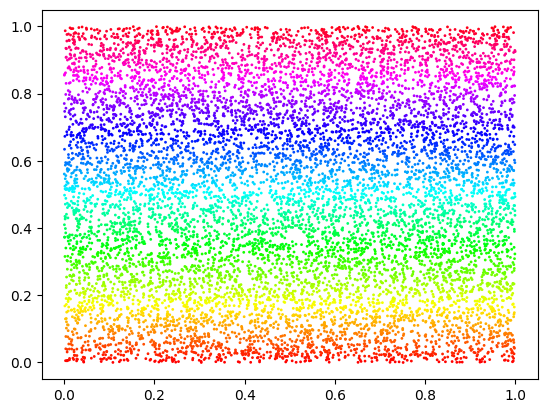

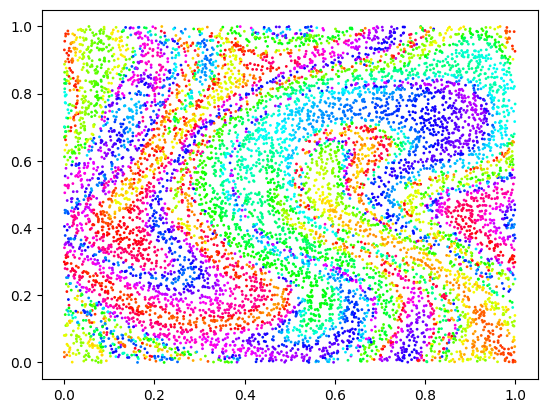

In [69]:
plt.scatter(x=x_pos[0], y=y_pos[0], c=starting_pos[0], s=1, cmap=colour_map)
plt.show()
plt.scatter(x=x_pos[-1], y=y_pos[-1], c=starting_pos[-1], s=1, cmap=colour_map)
plt.show()

In [70]:
create_animation(x_pos, y_pos, starting_pos, 'no_reproduction')

In [71]:
x_pos, y_pos, starting_pos = run_simulation_animation(n, iters, L_max, True)

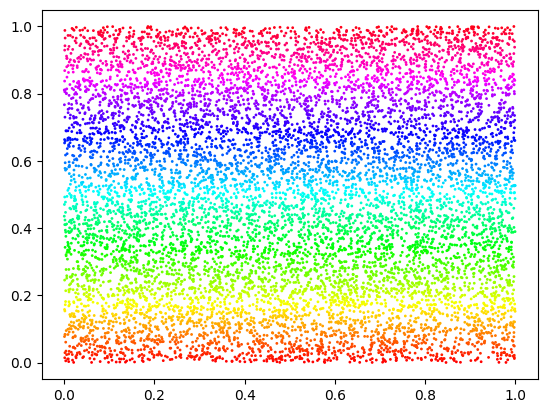

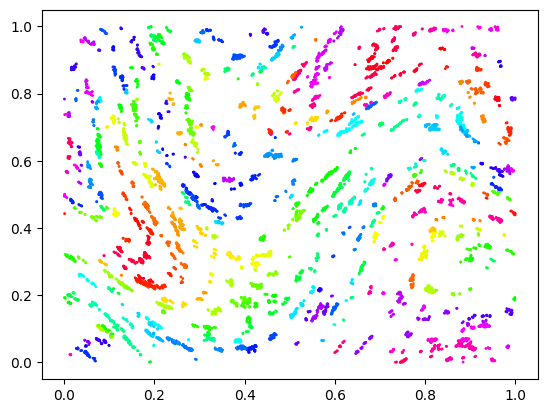

In [72]:
plt.scatter(x=x_pos[0], y=y_pos[0], c=starting_pos[0], s=1, cmap=colour_map)
plt.show()
plt.scatter(x=x_pos[-1], y=y_pos[-1], c=starting_pos[-1], s=1, cmap=colour_map)
plt.show()

In [73]:
create_animation(x_pos, y_pos, starting_pos, 'reproduction')